## Create Dataset

In [1]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split, Subset

In [2]:
# Load dataset using ImageFolder
dataset = datasets.ImageFolder("../1_raw/NCT-CRC-HE-100K/")

In [3]:
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

In [4]:
train_indices, val_indices, test_indices = random_split(range(len(dataset)), [train_size, val_size, test_size])

In [5]:
train_set = Subset(dataset, train_indices)
val_set = Subset(dataset, val_indices)
test_set = Subset(dataset, test_indices)

## Investigate Class Distritbution

In [21]:
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
def visualize_class_distribution(subset, title):
    # Extract class labels
    class_idx_to_label = { v:k for k,v in subset.dataset.class_to_idx.items() }
    class_labels = [ class_idx_to_label[subset.dataset.targets[i]] for i in subset.indices]

    # Count occurrences of each class
    class_counts = Counter(class_labels)

    # Plot the class distribution
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title(title)
    plt.show()

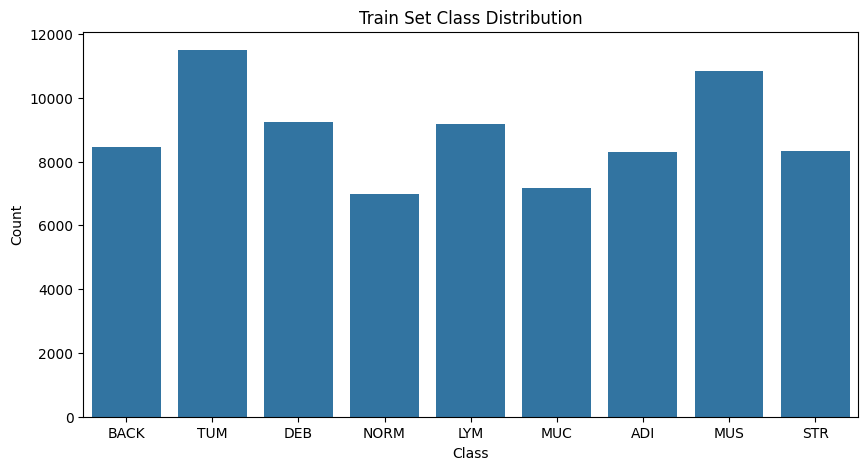

In [23]:
visualize_class_distribution(train_set, 'Train Set Class Distribution')

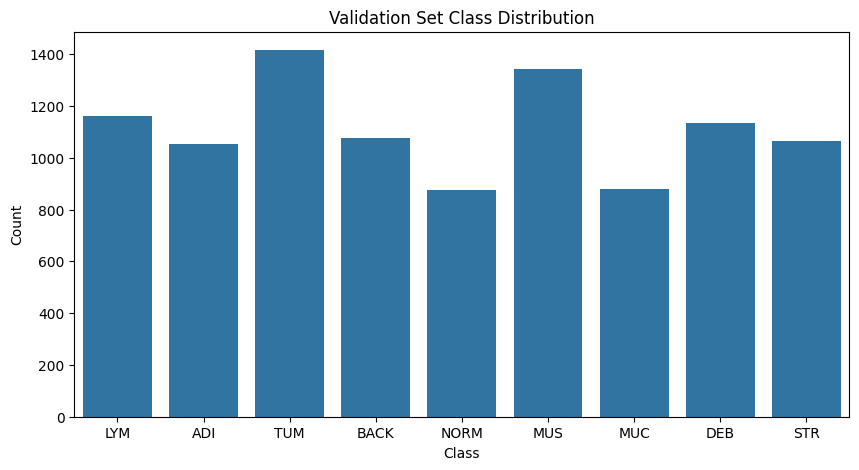

In [25]:
visualize_class_distribution(val_set, 'Validation Set Class Distribution')

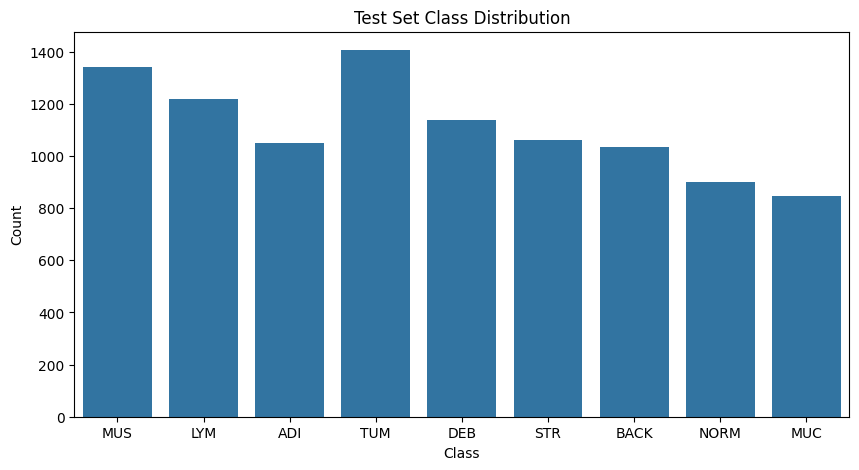

In [26]:
visualize_class_distribution(test_set, 'Test Set Class Distribution')

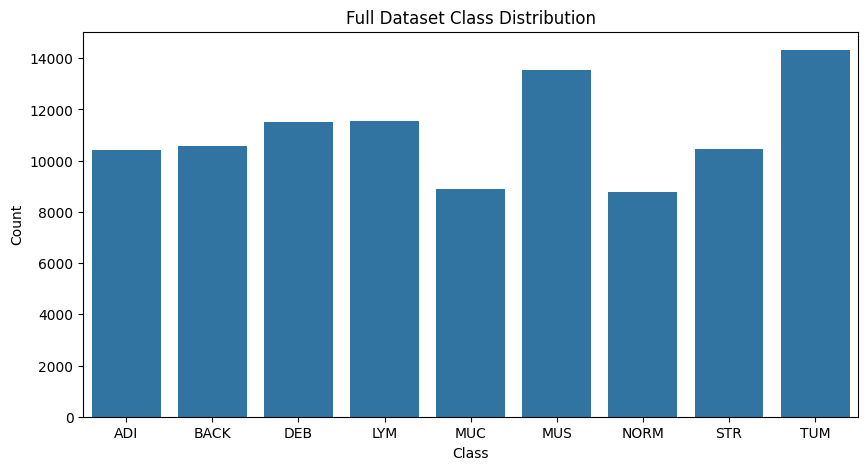

In [30]:
# Extract class labels
class_idx_to_label = { v:k for k,v in dataset.class_to_idx.items() }
class_labels = [ class_idx_to_label[class_idx] for class_idx in dataset.targets]

# Count occurrences of each class
class_counts = Counter(class_labels)

# Plot the class distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Full Dataset Class Distribution')
plt.show()